In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,KFold

In [469]:
df = pd.read_csv("balanced_codeforces_dataset_v3.csv")

In [470]:
df.head()

,handle,*special,2-sat,binary search,bitmasks,brute force,chinese remainder theorem,combinatorics,constructive algorithms,data structures,...,probabilities,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,trees,two pointers,label
0,coopcooop,0,1,48,17,74,0,15,95,40,...,0,2,5,59,1,34,2,6,31,1
1,weak_user_259,2,1,0,3,0,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,weak_user_1050,0,0,0,0,0,3,3,0,0,...,0,5,0,4,3,2,0,0,0,0
3,weak_user_1371,0,0,1,0,0,0,0,0,2,...,2,0,4,0,0,0,0,0,0,0
4,weak_user_1994,0,0,0,1,4,0,0,4,3,...,0,0,0,0,0,2,0,0,0,0


In [471]:
df.label.value_counts()

label
1    2904
0    2904
Name: count, dtype: int64

In [472]:
df.isna().sum()

handle                       0
*special                     0
2-sat                        0
binary search                0
bitmasks                     0
brute force                  0
chinese remainder theorem    0
combinatorics                0
constructive algorithms      0
data structures              0
dfs and similar              0
divide and conquer           0
dp                           0
dsu                          0
expression parsing           0
fft                          0
flows                        0
games                        0
geometry                     0
graph matchings              0
graphs                       0
greedy                       0
hashing                      0
implementation               0
interactive                  0
math                         0
matrices                     0
meet-in-the-middle           0
number theory                0
probabilities                0
schedules                    0
shortest paths               0
sortings

In [473]:
df.duplicated().sum()

np.int64(0)

In [474]:
x = df.drop(columns=['handle','label'], axis=1)
y = df['label']

In [475]:
MMs = MinMaxScaler()

In [476]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state= 42)

In [477]:
x_train = MMs.fit_transform(x_train)
x_test = MMs.transform(x_test)

In [478]:
Knn = KNeighborsClassifier(n_neighbors=7)

In [479]:
model2 = Knn.fit(x_train, y_train)

In [480]:
pred_label_2 = model2.predict(x_test)

In [481]:
accuracy_score(y_test, pred_label_2)

0.9776247848537005

In [482]:
cm = confusion_matrix(y_test, pred_label_2)

<Axes: >

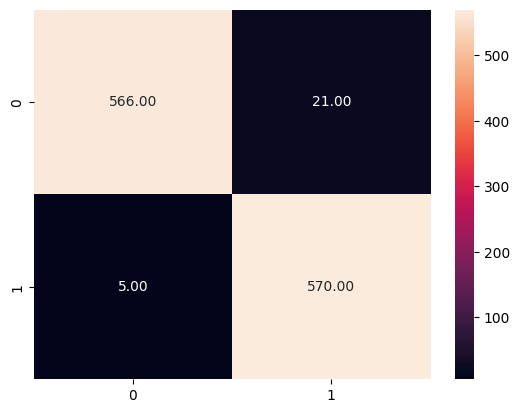

In [483]:
sns.heatmap(cm , annot=True, fmt=".2f")

In [484]:
print(classification_report(y_test, pred_label_2))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       587
           1       0.96      0.99      0.98       575

    accuracy                           0.98      1162
   macro avg       0.98      0.98      0.98      1162
weighted avg       0.98      0.98      0.98      1162



In [485]:
y_proba = model2.predict_proba(x_test)[:,1]

In [486]:
y_proba

array([1.        , 0.28571429, 0.        , ..., 1.        , 0.        ,
       1.        ], shape=(1162,))

In [487]:
y_pred = (y_proba >= .5).astype(int)

In [488]:
accuracy_score(y_test, y_pred)

0.9776247848537005

<Axes: >

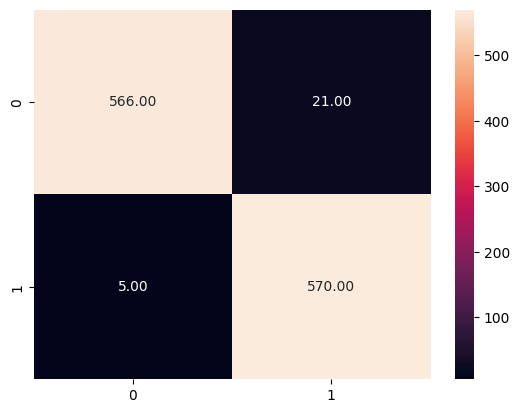

In [489]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = ".2f")

In [495]:
data = (1,0,0,0,40,0,0,35,0,0,0,23,3,0,0,0,0,0,0,7,0,0,44,0,0,0,0,20,0,0,1,31,0,0,0,0,0)

data_array = np.array(data).reshape(1,-1)

data_array_proba = model2.predict_proba(data_array)

# prediction = model2.predict(data_array)
# prediction
data_array_proba

array([[0., 1.]])

In [ ]:
# Very weak profile (should predict 0)
weak_data = np.array([0,0,5,3,10,0,1,8,3,1,0,4,0,0,0,0,1,1,0,1,15,0,8,0,12,0,0,2,0,0,0,6,0,5,0,0,2]).reshape(1,-1)

# Medium profile (close to pupil, should predict 1)
medium_data = np.array([1,0,20,12,50,0,8,40,18,5,1,22,3,0,0,0,8,6,1,5,90,1,45,2,85,0,0,18,1,0,2,35,0,25,0,3,15]).reshape(1,-1)

weak_scaled = MMs.transform(weak_data)
medium_scaled = MMs.transform(medium_data)
model2.predict(weak_scaled)

print(f"Weak profile prediction: {}")  # Should be 0
print(f"Medium profile prediction: {model2.predict(medium_scaled)}")  # Should be 1

Weak profile prediction: [1]
Medium profile prediction: [1]


c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [492]:
Kfolds = KFold(n_splits=5)

In [493]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Knn, x_train, y_train, cv=Kfolds)
print(f"Average CV Score: {scores.mean():.4f}")

Average CV Score: 0.9720
